Imports

In [1]:
# help out
from os import listdir
# data
import pandas as pd
# stats
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
# models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa import ar_model
import pmdarima as pm
from statsmodels.regression.rolling import RollingOLS

Directories

In [2]:
folders = listdir("C:/Users/Keegan/OneDrive/1 Studies/2021 - 2022/5003W/3 - Dissertation/5-Data/results/fanomal/stats_models/ae_results")
subfolders = ["models","plots","results","trade"]
spx_main_dir = "C:/Users/Keegan/OneDrive/1 Studies/2021 - 2022/5003W/3 - Dissertation/5-Data/results/fanomal/stats_models/ae_results/SPX.Index/models/AE[64, 46, 28, 10]__2022-12-20__T_11_17_43/error/"
filenames = listdir(spx_main_dir)
dirs = [spx_main_dir+d for d in filenames]
spx_error = ['full_mae', 'full_mse','test_mae', 'test_mse', 'train_mae', 'train_mse']

Get data

In [3]:
# all data
data = {n:pd.read_csv(d).rename({'date':"date","0":n}, axis=1).astype({'date':'datetime64[ns]',n:'float'}) for (d,n) in zip(dirs, spx_error)}
data
# selected data
dates = data['full_mse'].date.values
dataset = data['full_mse'].set_index('date')

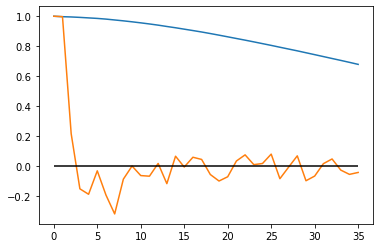

In [4]:
plt.plot(acf(dataset))
plt.plot(pacf(dataset))
plt.hlines(y=0, xmin=0, xmax=35, colors='black')

Specify dates for snips

In [5]:
# Event study parameters
E1 = pd.to_datetime("2020-01-13")
E2 = pd.to_datetime("2020-01-24")
E3 = pd.to_datetime("2020-02-24")
E4 = pd.to_datetime("2020-03-09")

# AE train minimum
EXCLUSION = pd.to_datetime("2010-01-01")

# Cuts
CUT1 = [pd.to_datetime("2010-01-01"), pd.to_datetime("2011-01-01")]
CUT2 = [pd.to_datetime("2011-01-01"), pd.to_datetime("2012-03-31")]
CUT3 = [pd.to_datetime("2015-01-01"), pd.to_datetime("2016-01-01")]
CUT4 = [pd.to_datetime("2017-07-01"), pd.to_datetime("2018-06-30")]
CUT5 = [pd.to_datetime("2018-06-30"), pd.to_datetime("2019-03-31")]
CUT6 = [pd.to_datetime("2019-06-30"), pd.to_datetime("2020-06-30")]

cut_lst = [CUT1, CUT2, CUT3, CUT4, CUT5, CUT6]

CALM = [pd.to_datetime("2012-03-31"), pd.to_datetime("2015-06-30")]

CUT3_EXTENDED = [pd.to_datetime("2013-01-01"), pd.to_datetime("2016-01-01")] 

In [6]:
len(dataset)

3494

In [8]:
cuts = [dataset[(dataset.index>=cut[0]) & (dataset.index<=cut[1])] for cut in cut_lst]

[Timestamp('2010-01-01 00:00:00'), Timestamp('2011-01-01 00:00:00')]
[Timestamp('2011-01-01 00:00:00'), Timestamp('2012-03-31 00:00:00')]
[Timestamp('2015-01-01 00:00:00'), Timestamp('2016-01-01 00:00:00')]
[Timestamp('2017-07-01 00:00:00'), Timestamp('2018-06-30 00:00:00')]
[Timestamp('2018-06-30 00:00:00'), Timestamp('2019-03-31 00:00:00')]
[Timestamp('2019-06-30 00:00:00'), Timestamp('2020-06-30 00:00:00')]


[(<Figure size 432x288 with 1 Axes>, None),
 (<Figure size 432x288 with 1 Axes>, None),
 (<Figure size 432x288 with 1 Axes>, None),
 (<Figure size 432x288 with 1 Axes>, None),
 (<Figure size 432x288 with 1 Axes>, None),
 (<Figure size 432x288 with 1 Axes>, None)]

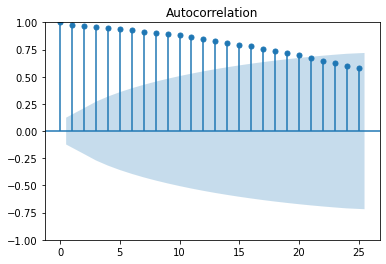

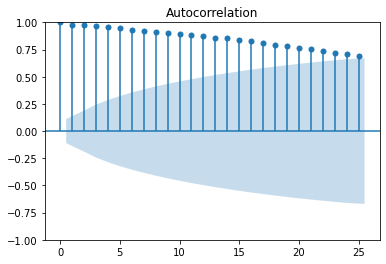

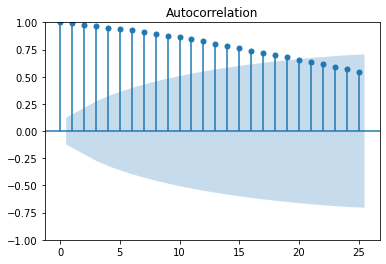

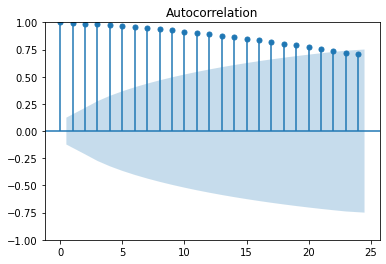

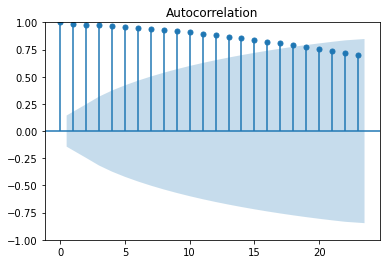

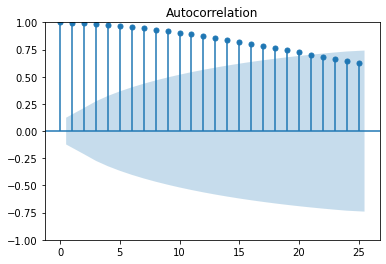

In [9]:
[(plot_acf(x), print(cut) )for (x, cut) in zip(cuts, cut_lst)]

,full_mse
date,
2019-07-01,NaN
2019-07-02,-2.722875
2019-07-03,4.076515
2019-07-05,-3.100699
2019-07-08,-2.079110
...,...
2020-06-24,-89.255445
2020-06-25,10.647474
2020-06-26,-60.646168


c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>]

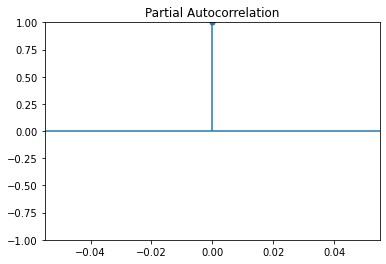

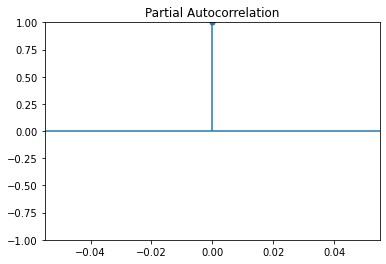

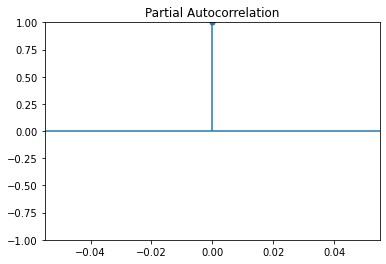

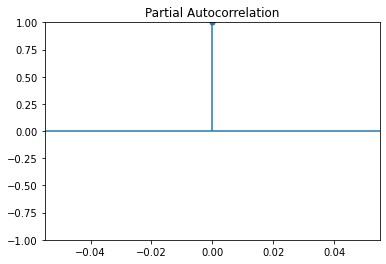

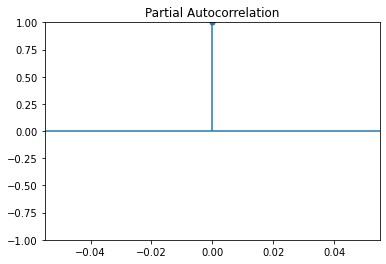

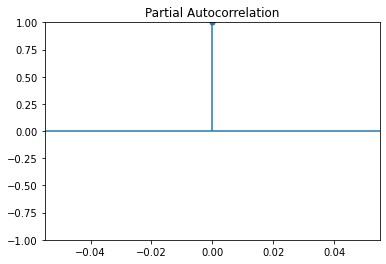

In [23]:
[plot_pacf(x) for x in cuts]

In [11]:
for cut in cuts:
    pm.auto_arima(cut)

c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [12]:
test_fit = pm.auto_arima(cuts[0])

In [13]:
from sklearn.preprocessing import StandardScaler as ss

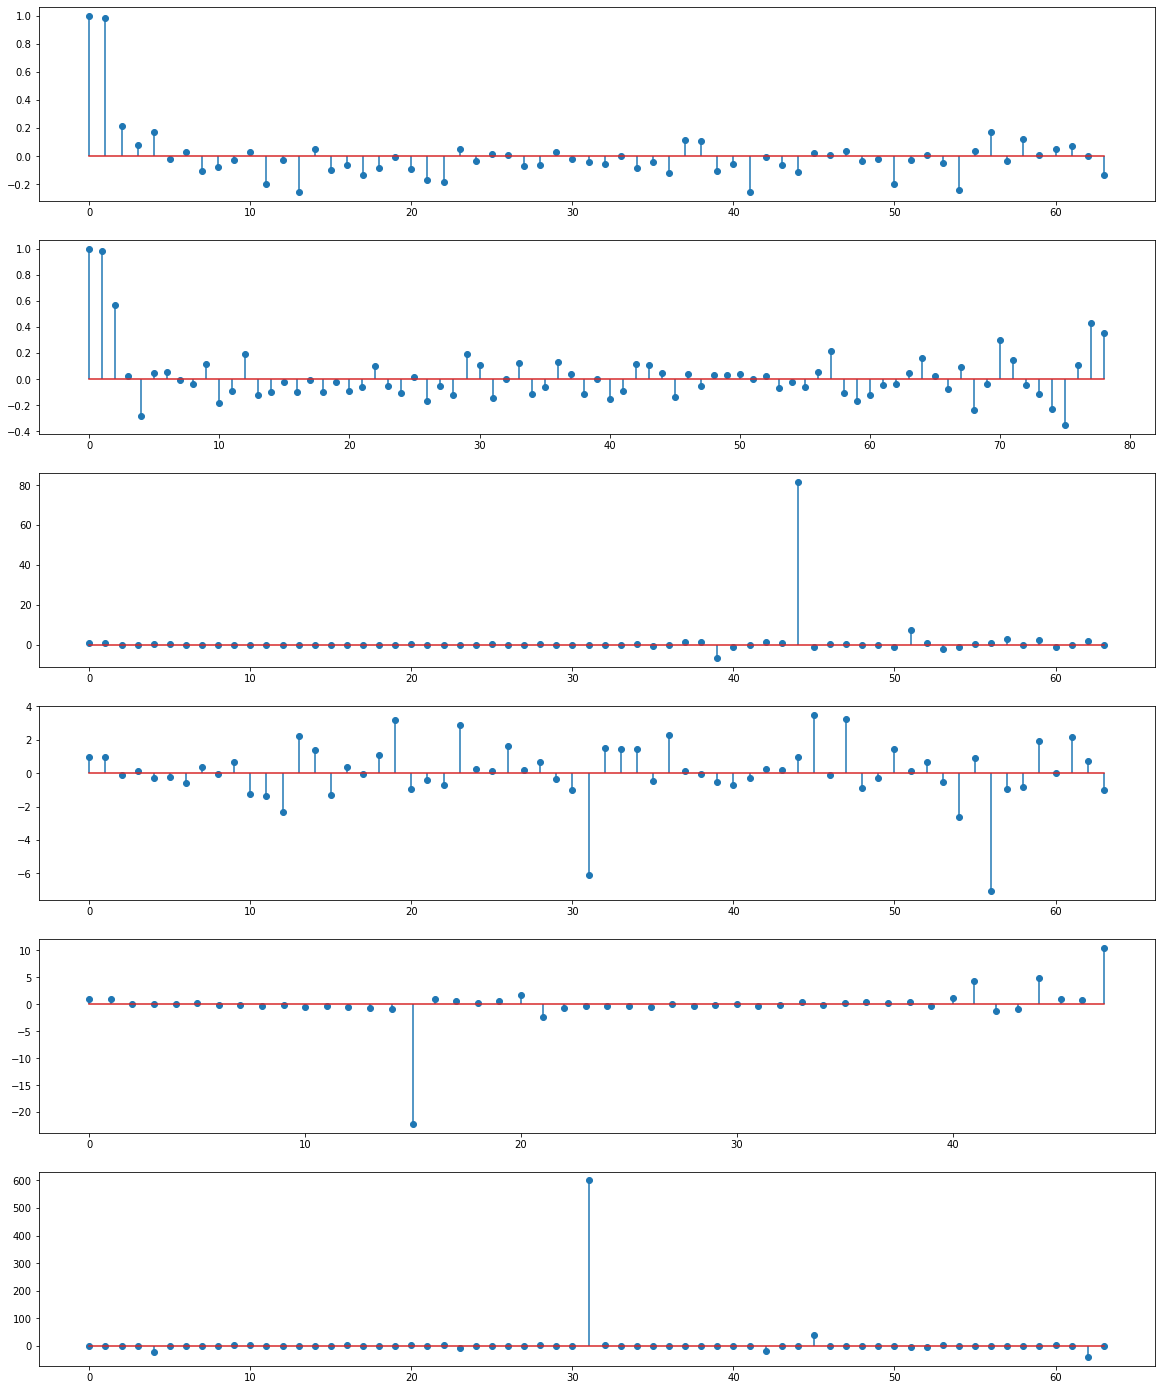

In [31]:
fig, ax = plt.subplots(6)
fig.set_size_inches(20,25)
s = ss()

for i in range(len(cuts)):
    x = cuts[i]
    # x[x.columns[0]] = s.fit_transform(x.values)
    x = pacf(x, nlags=round(len(cuts[i])/4,0))
    ax[i].stem(x)

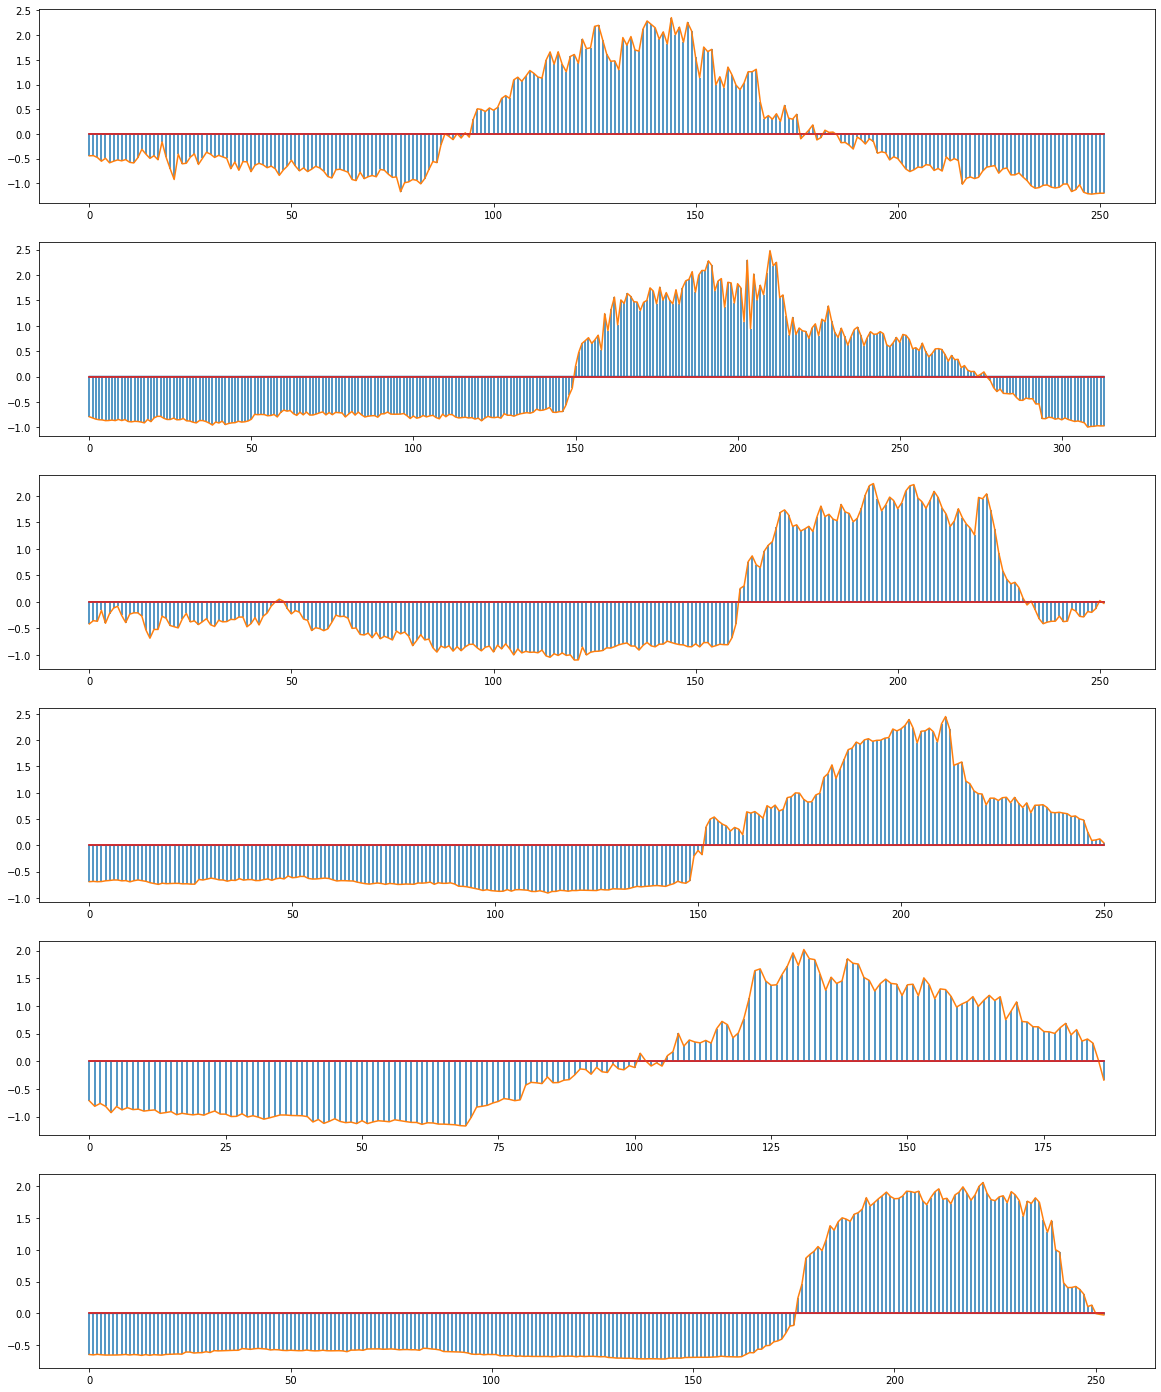

In [34]:
fig, ax = plt.subplots(6)
fig.set_size_inches(20,25)
s = ss()
for i in range(len(cuts)):
    x = cuts[i]
    # x = pacf(x, nlags=90)
    ax[i].stem(x, markerfmt='')
    ax[i].stem(s.fit_transform(x), markerfmt='')

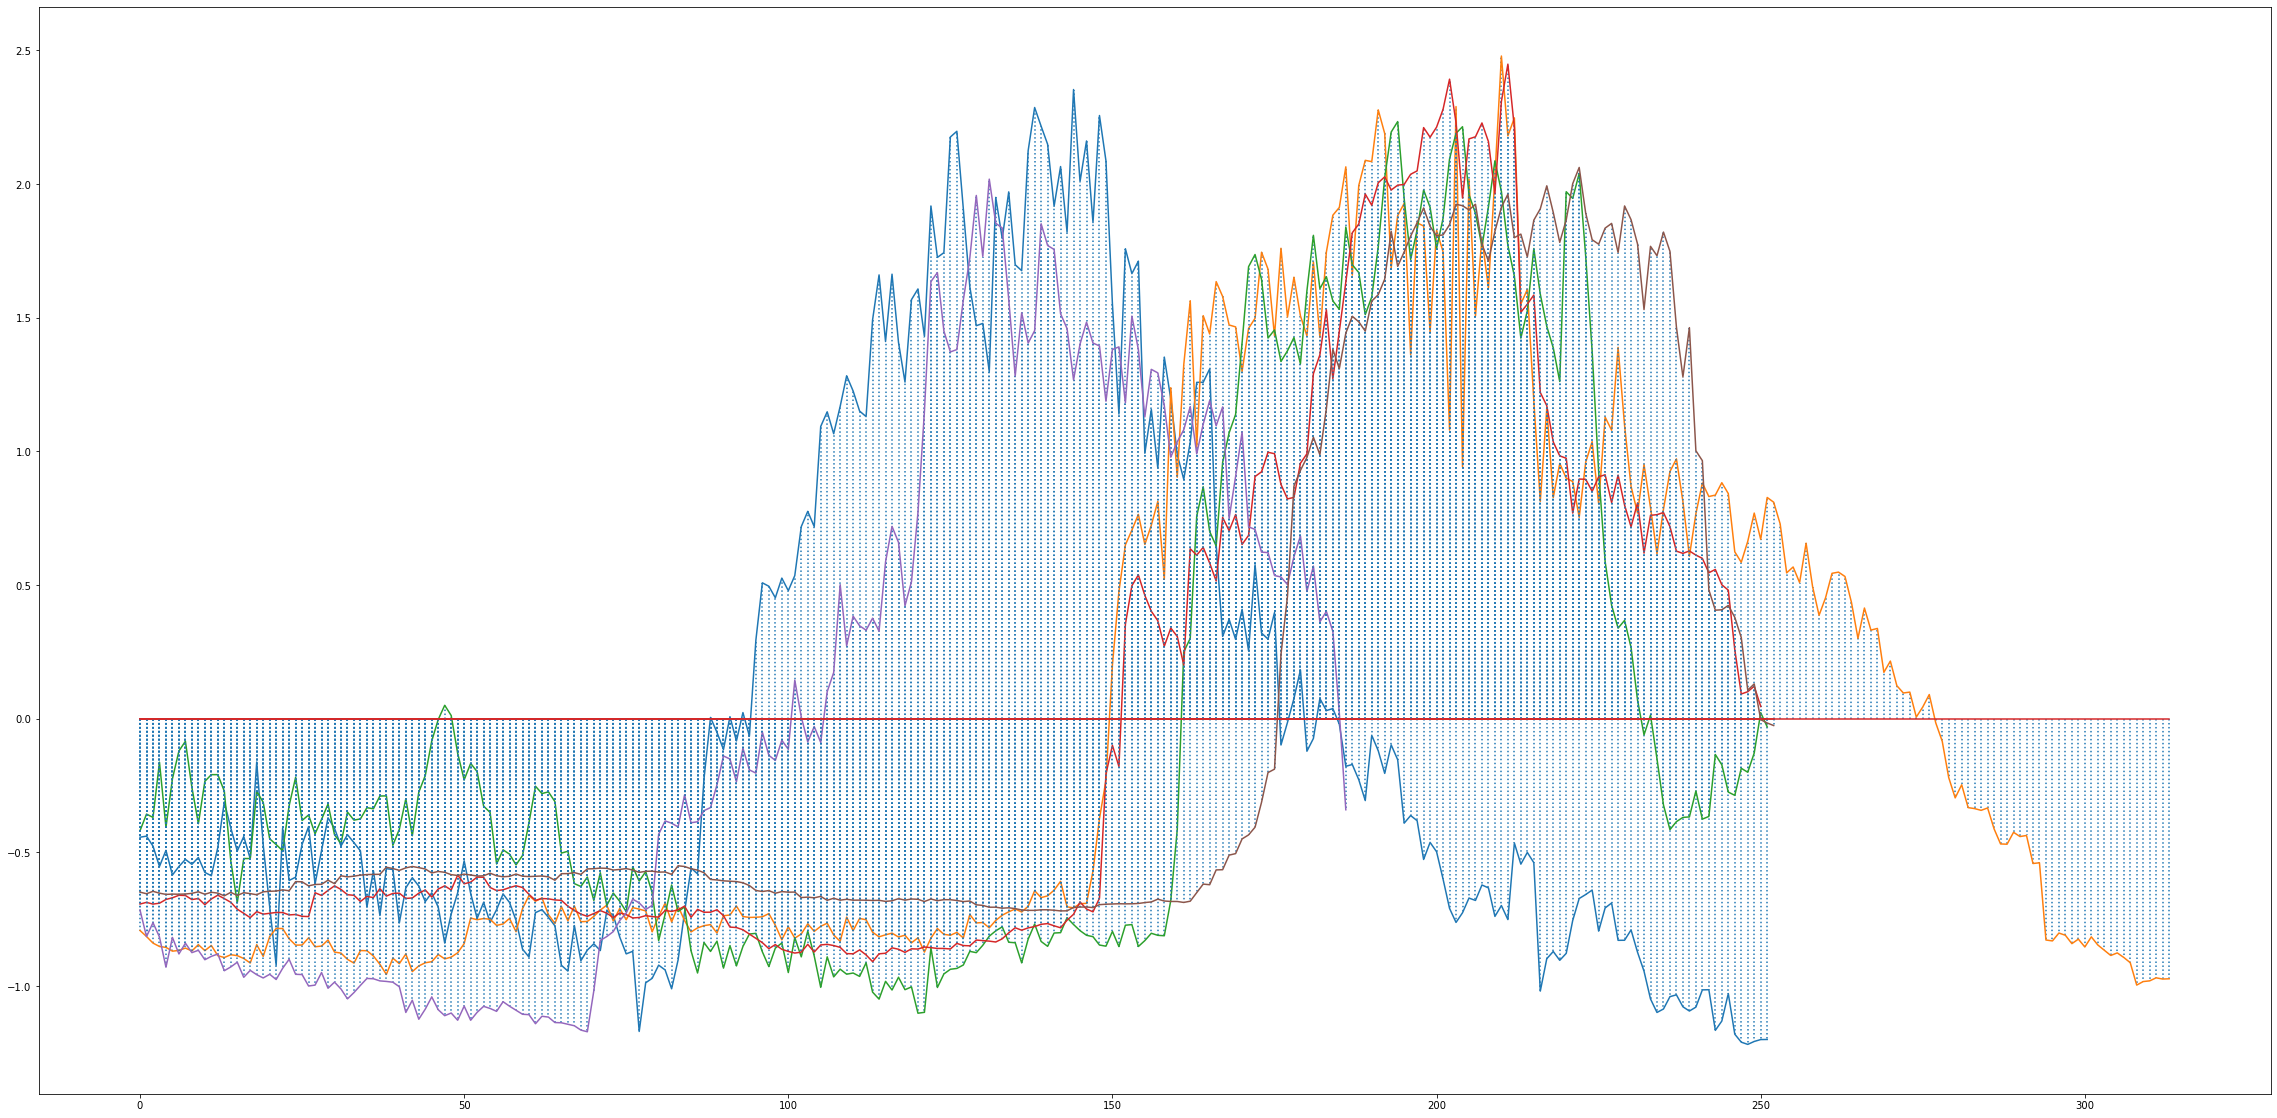

In [38]:
fig, ax = plt.subplots(1)
fig.set_size_inches(40,20)
s = ss()
for i in range(len(cuts)):
    x = cuts[i]
    # x = pacf(x, nlags=90)
    # ax[i].stem(x, markerfmt='')
    ax.stem(s.fit_transform(x), markerfmt='', linefmt=':')

In [44]:
calm_period = dataset[(dataset.index>=CALM[0]) & (dataset.index<=CALM[1])]

In [51]:
calm_period.median()

full_mse    0.000044
dtype: float64

<StemContainer object of 3 artists>

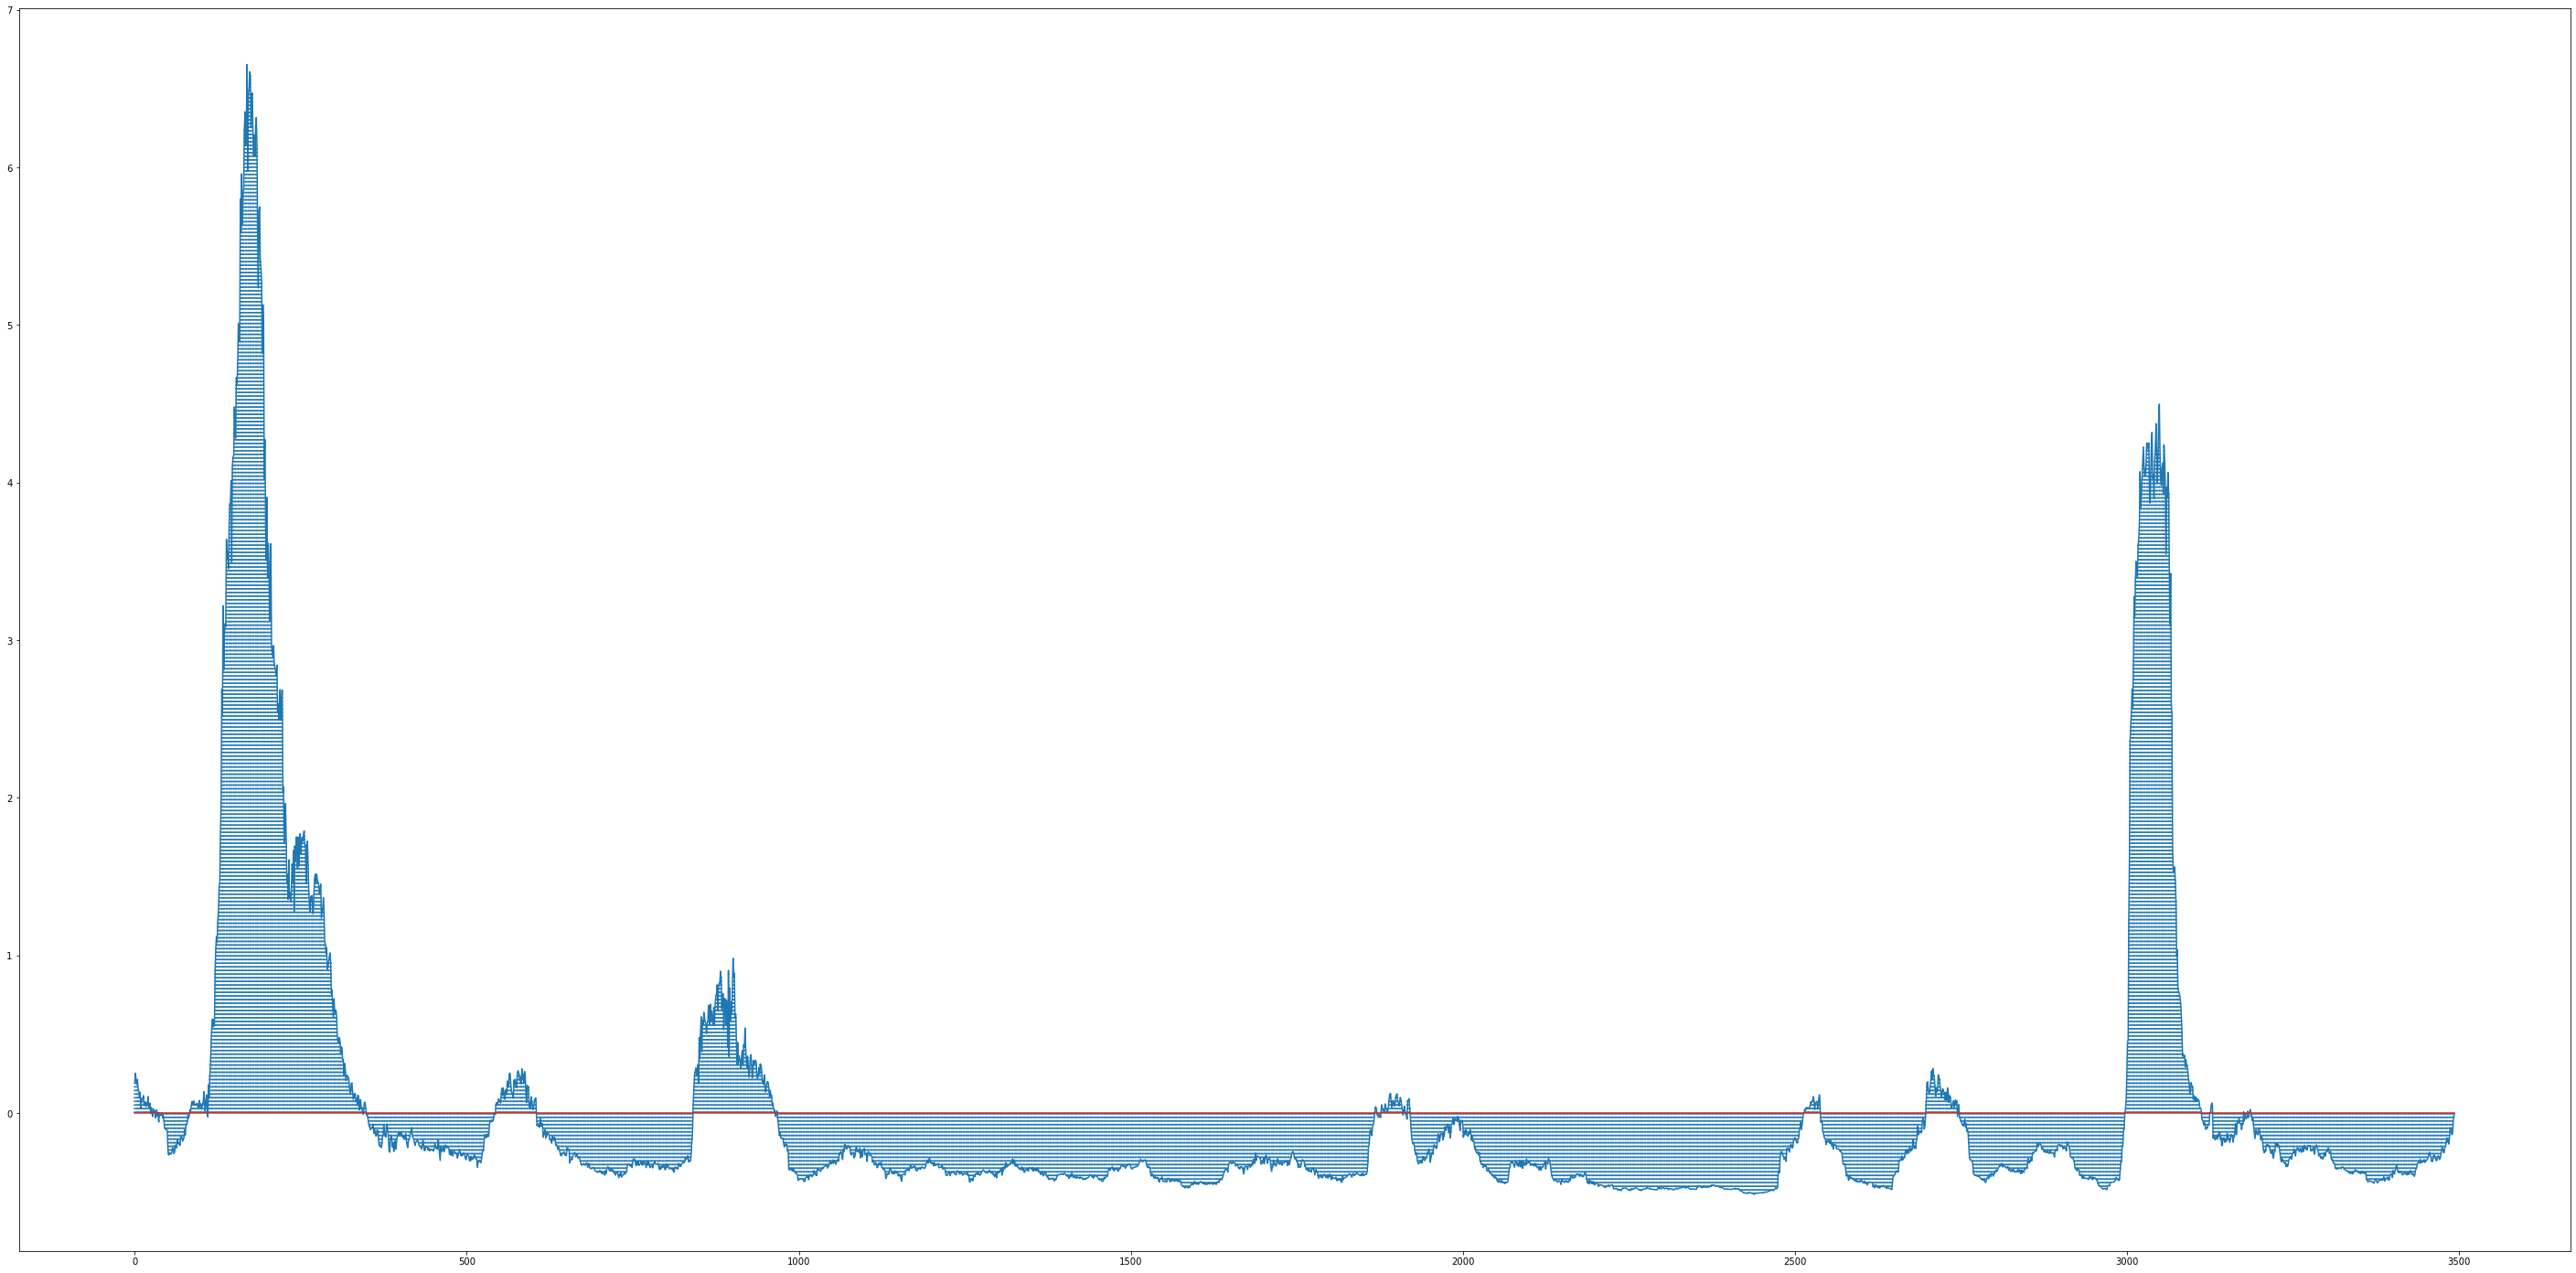

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(50,25)
s = ss().fit(calm_period)
s2 = s
s2.mean_ = calm_period.median()
ax.stem(s.fit_transform(dataset.values), markerfmt='', linefmt=':')
# ax.stem(s2.fit_transform(dataset.values), markerfmt='', linefmt=':')
# ax.stem(ss().fit_transform(dataset.values), markerfmt='', linefmt=':')


In [17]:
means = []
stdevs = []
for i in range(len(cuts)):
    x = cuts[i]
    means.append(x.mean())
    stdevs.append(x.std())

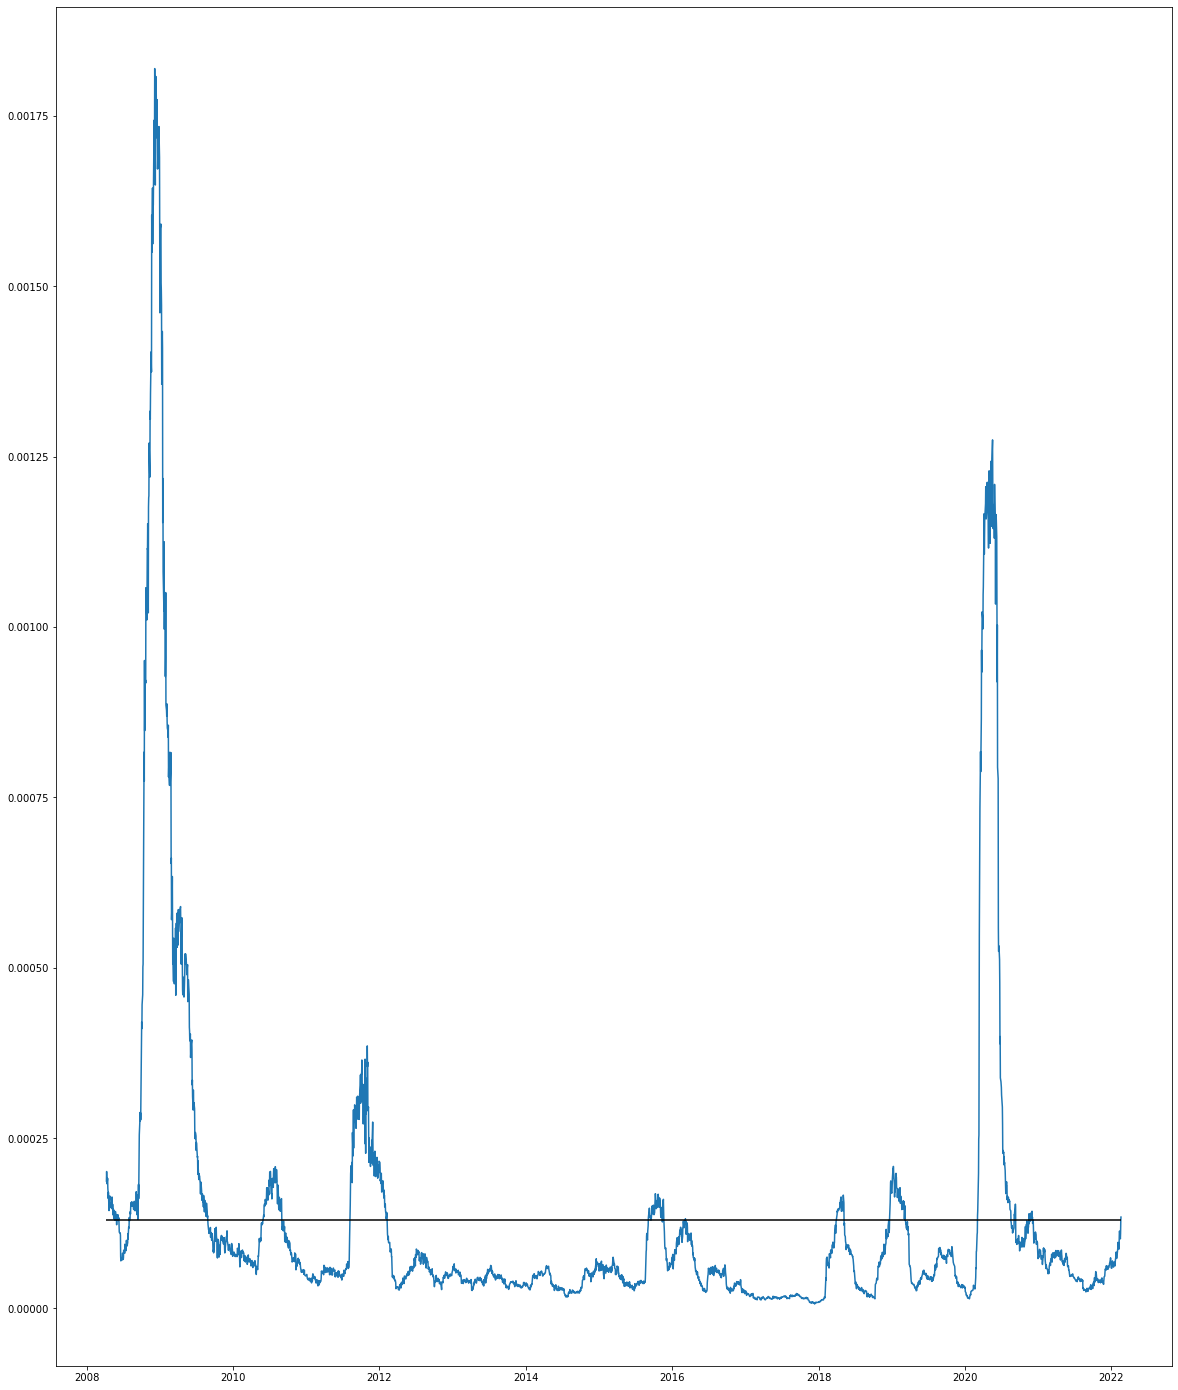

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20,25)

ax.plot(dataset)
ax.hlines(y=sum(means)/len(means), xmin=dataset.index[0], xmax=dataset.index[-1], colors='black')

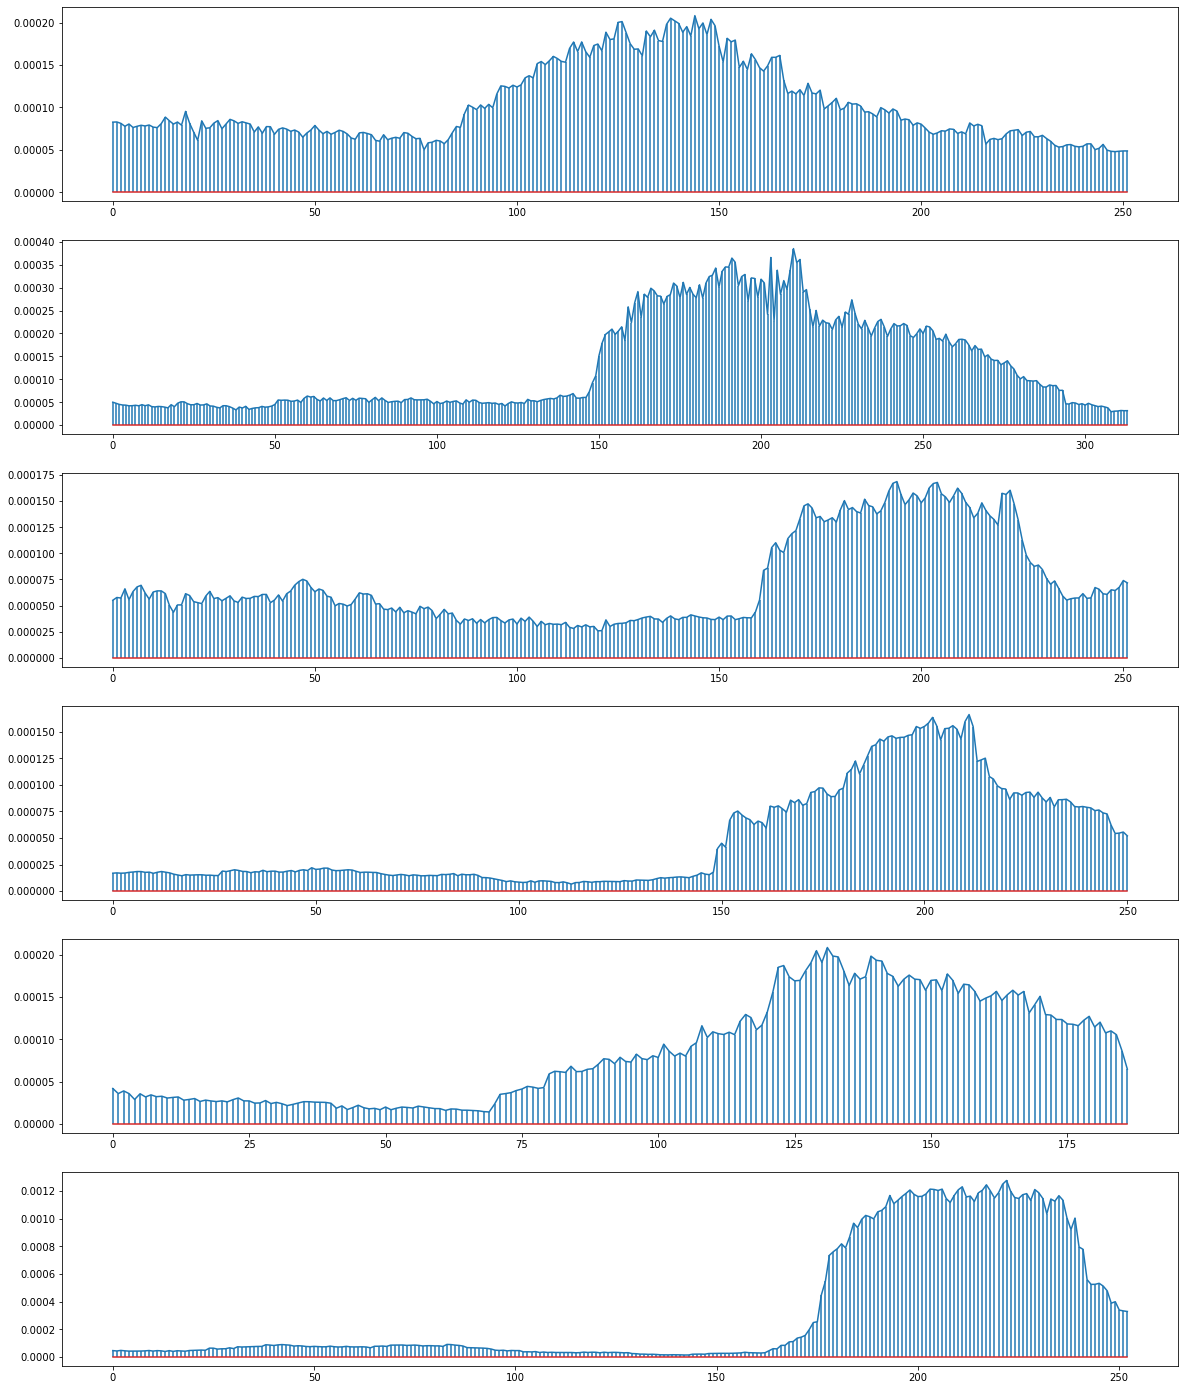

In [19]:
fig, ax = plt.subplots(6)
fig.set_size_inches(20,25)

for i in range(len(cuts)):
    x = cuts[i]
    # x = pacf(x, nlags=90)
    ax[i].stem(x, markerfmt='')

In [20]:
RollingOLS()

TypeError: __init__() missing 2 required positional arguments: 'endog' and 'exog'

In [ ]:
model = ar_model.AutoReg(dataset, lags=20, trend='ct', hold_back=150).fit()
# snip = dataset.rolling()
# model.predict(dynamic=False)
model.forecast()

c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


3494    0.000133
dtype: float64

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,25)

ax.plt(dataset[dataset.iloc])

TypeError: expected 0 arguments, got 1